In [1]:
using Gen
include("../src/inference/particle_filter.jl")

gp_particle_filter (generic function with 3 methods)

Function: Mul(Lin(-0.22598003997625038, 0.5261731178541327), Lin(-0.7155183748601821, 0.19249504149163865), 3)


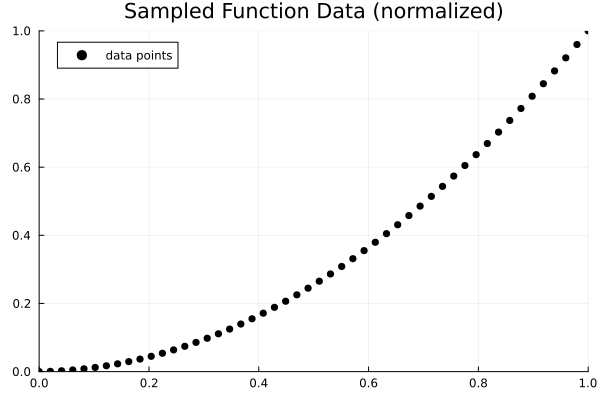

In [2]:
# generate data
using Plots

include("../src/data_gen.jl")

fn = function_prior();
xs, ys, fn, (xmin_orig, xmax_orig) = get_data(fn, 50);
println("Function: ", fn)
scatter(xs, ys, xlims=(0, 1), ylims=(0, 1), 
        title="Sampled Function Data (normalized)", label="data points", color="black")


In [3]:
# include("../src/inference/relevance.jl")

traces = gp_particle_filter(xs, ys, 5, 5, 5, 10)

# Look at results
for (i, tr) in enumerate(traces)
    println("Sample $i: $(get_retval(tr))")
end

Sample 1: Times(Times(Linear(0.1558334296080106), SquaredExponential(0.6626308058301021), 3), Constant(0.8227564015872135), 5)
Sample 2: Times(Plus(Linear(0.005113009933291779), Linear(0.04048184617916273), 3), Linear(0.09375502732722152), 5)
Sample 3: Times(Times(Linear(0.1558334296080106), SquaredExponential(0.6626308058301021), 3), Constant(0.8227564015872135), 5)
Sample 4: Times(Plus(Linear(0.005113009933291779), Linear(0.04048184617916273), 3), Linear(0.09375502732722152), 5)
Sample 5: Times(Times(Linear(0.1558334296080106), SquaredExponential(0.6626308058301021), 3), Constant(0.8227564015872135), 5)
Sample 6: SquaredExponential(0.7905002260378878)
Sample 7: Times(Plus(Linear(0.005113009933291779), Linear(0.04048184617916273), 3), Linear(0.09375502732722152), 5)
Sample 8: Plus(SquaredExponential(0.9006651556861098), Linear(0.687441982649408), 3)
Sample 9: SquaredExponential(0.8992978442734024)
Sample 10: SquaredExponential(0.8992978442734024)


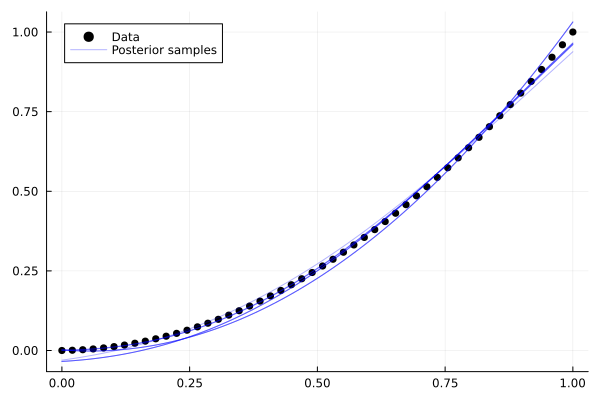

In [5]:
include("../src/covariance.jl")


function plot_posterior_samples(traces, xs, ys)
    p = scatter(xs, ys, label="Data", color=:black, markersize=4)
    
    x_test = collect(range(minimum(xs), maximum(xs), length=100))
    
    # Plot each posterior sample
    for (i, tr) in enumerate(traces)
        kernel = get_retval(tr)
        noise = tr[:noise]
        
        # Posterior predictive mean
        μ, σ² = compute_predictive(kernel, noise, xs, ys, x_test)
        
        plot!(p, x_test, μ, alpha=0.3, label=(i==1 ? "Posterior samples" : ""), 
              color=:blue)
    end
    
    return p
end

plot_posterior_samples(traces, xs, ys)